# Car Price Prediction EDA (Exploratory Data Analysis)

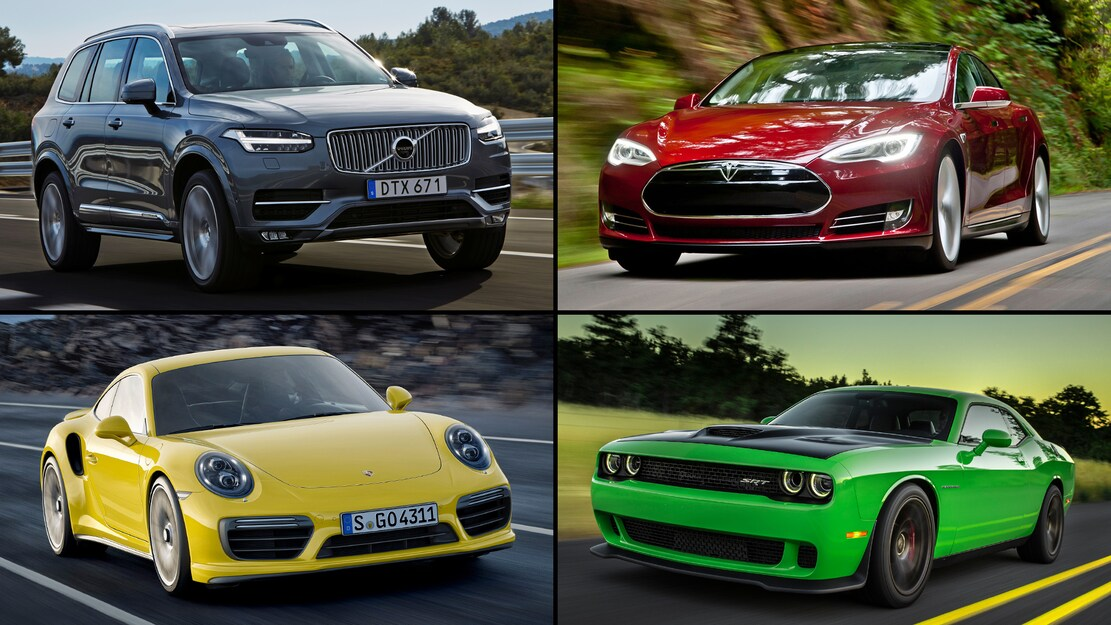

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 1 `( Data Cleaning )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df = pd.read_json("scout_car.json", lines=True)  # lines = True --> Provides to read .json file line by line.

In [3]:
df.head(3).T  # Let's check the all columns and their names. 

0  \
url                            https://www.autoscout24.com//offers/audi-a1-sp...   
make_model                                                               Audi A1   
short_description                    Sportback 1.4 TDI S-tronic Xenon Navi Klima   
body_type                                                                 Sedans   
price                                                                      15770   
vat                                                               VAT deductible   
km                                                                     56,013 km   
registration                                                             01/2016   
prev_owner                                                     2 previous owners   
kW                                                                           NaN   
hp                                                                         66 kW   
Type                                     [, Used, , Diesel (Particulate Filter)]   
Previous Owners                                                            \n2\n   
Next Inspection                            [\n06/2021\n, \n99 g CO2/km (comb)\n]   
Inspection new                                             [\nYes\n, \nEuro 6\n]   
Warranty                                                 [\n, \n, \n4 (Green)\n]   
Full Service                                                            [\n, \n]   
Non-smoking Vehicle                                                     [\n, \n]   
null                                                                          []   
Make                                                                    \nAudi\n   
Model                                                               [\n, A1, \n]   
Offer Number                                                     [\nLR-062483\n]   
First Registration                                                [\n, 2016, \n]   
Body Color                                                       [\n, Black, \n]   
Paint Type                                                        [\nMetallic\n]   
Body Color Original                                          [\nMythosschwarz\n]   
Upholstery                                                    [\nCloth, Black\n]   
Body                                                            [\n, Sedans, \n]   
Nr. of Doors                                                             [\n5\n]   
Nr. of Seats                                                             [\n5\n]   
Model Code                                                        [\n0588/BDF\n]   
Gearing Type                                                 [\n, Automatic, \n]   
Displacement                                                      [\n1,422 cc\n]   
Cylinders                                                                [\n3\n]   
Weight                                                            [\n1,220 kg\n]   
Drive chain                                                          [\nfront\n]   
Fuel                                       [\n, Diesel (Particulate Filter), \n]   
Consumption                    [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...   
CO2 Emission                                            [\n99 g CO2/km (comb)\n]   
Emission Class                                                      [\nEuro 6\n]   
\nComfort & Convenience\n      [Air conditioning, Armrest, Automatic climate ...   
\nEntertainment & Media\n      [Bluetooth, Hands-free equipment, On-board com...   
\nExtras\n                     [Alloy wheels, Catalytic Converter, Voice Cont...   
\nSafety & Security\n          [ABS, Central door lock, Daytime running light...   
description                    [\n, Sicherheit:,  , Deaktivierung für Beifahr...   
Emission Label                                                               NaN   
Gears                                                                        NaN   
Country version                                

In [4]:
df.info()  # to check dataset's general info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [5]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [6]:
# Let's fix this messy --> rename columnns name
df= df.rename(columns={"\nComfort & Convenience\n" : "Comfort_Convenience", 
                       "\nEntertainment & Media\n" : "Entertainment_Media",
                       "\nExtras\n" : 'Extras', 
                       "\nSafety & Security\n" : 'Safety_Security'})

In [7]:
# Let's fix name as title [i.title() for i in df.columns]
df.columns = list(map(lambda x : x.title(), df.columns))

In [8]:
df.info()  # Now, it's looking better.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Url                            15919 non-null  object 
 1   Make_Model                     15919 non-null  object 
 2   Short_Description              15873 non-null  object 
 3   Body_Type                      15859 non-null  object 
 4   Price                          15919 non-null  int64  
 5   Vat                            11406 non-null  object 
 6   Km                             15919 non-null  object 
 7   Registration                   15919 non-null  object 
 8   Prev_Owner                     9091 non-null   object 
 9   Kw                             0 non-null      float64
 10  Hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [9]:
df.shape  # we can also learn row and column numbers with .shape()

(15919, 54)

In [10]:
df.isnull().sum()/df.shape[0]*100  # we can calculate the percentage of null values of each columns have.

Url                               0.000
Make_Model                        0.000
Short_Description                 0.289
Body_Type                         0.377
Price                             0.000
Vat                              28.350
Km                                0.000
Registration                      0.000
Prev_Owner                       42.892
Kw                              100.000
Hp                                0.000
Type                              0.013
Previous Owners                  41.711
Next Inspection                  77.794
Inspection New                   75.300
Warranty                         34.047
Full Service                     48.395
Non-Smoking Vehicle              54.916
Null                              0.000
Make                              0.000
Model                             0.000
Offer Number                     19.945
First Registration               10.032
Body Color                        3.750
Paint Type                       36.259


<b>Droping columns that have %90 percent and higher of missing values.</b> By creating a useful def functions.

In [11]:
# percentage of nans 
def perc_nans(df, limit):  # our definiton function's name and parameters.
    missing = df.isnull().sum()*100/df.shape[0]  # percentage of null values of specified parameters
    return missing.loc[lambda x : x >= limit]  # output of columns meeting our condition

In [12]:
perc_nans(df,90) # shows columns that are greater and equal than to our nan percentage limit

Kw                              100.000
Electricity Consumption          99.139
Last Service Date                96.445
Other Fuel Types                 94.472
Availability                     96.011
Last Timing Belt Service Date    99.899
Available From                   98.291
dtype: float64

In [13]:
df.drop(perc_nans(df,90).index, axis=1, inplace=True) # drop columns under the limit

In [14]:
df.drop("Null", axis = 1, inplace = True)  # there is as "null" column in the dataset, so we will drop it.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Url                  15919 non-null  object
 1   Make_Model           15919 non-null  object
 2   Short_Description    15873 non-null  object
 3   Body_Type            15859 non-null  object
 4   Price                15919 non-null  int64 
 5   Vat                  11406 non-null  object
 6   Km                   15919 non-null  object
 7   Registration         15919 non-null  object
 8   Prev_Owner           9091 non-null   object
 9   Hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous Owners      9279 non-null   object
 12  Next Inspection      3535 non-null   object
 13  Inspection New       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full Service         8215 non-null   object
 16  Non-

## Let's examine and manipulate all the columns one by one

## Url

In [16]:
df.Url.value_counts(dropna=False)  # let's check counts of unique values

https://www.autoscout24.com//offers/renault-clio-energy-tce-120-edc-intens-gasoline-50524d55-242f-46c1-995e-eb951340dc45                             1
https://www.autoscout24.com//offers/opel-insignia-grand-sport-1-6-cdti-ecotec-innovation-diesel-265b87bb-8cda-4a6a-a9cc-ff3afb3cef9c                 1
https://www.autoscout24.com//offers/opel-astra-1-6-cdti-selective-diesel-e067a3d2-43c3-4929-8f3f-070b5e25b34f                                        1
https://www.autoscout24.com//offers/opel-corsa-e-active-ecoflex-1hand-shz-lhz-scheckheft-gasoline-grey-8aeea531-6fa5-44ca-bc72-de1040b27197          1
https://www.autoscout24.com//offers/renault-clio-iv-societe-dci-90-energy-eco2-82g-air-medianav-diesel-white-7fc8cbe2-88e9-4c88-bc85-bac396b078cd    1
                                                                                                                                                    ..
https://www.autoscout24.com//offers/renault-clio-tce-120-zen-energy-edc-88-kw-gasoline-grey-69

In [17]:
df.drop("Url", axis = 1, inplace = True)  # 15919 different unique values. let's drop it

## Make_model

In [18]:
df.Make_Model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: Make_Model, dtype: int64

In [19]:
df.Make.map(type).value_counts()

<class 'str'>    15919
Name: Make, dtype: int64

In [20]:
# Before move on, our dataset also has "Make" and "Model" columns. Let's inspect them.

## Make

In [21]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [22]:
df["Make"] = df.Make.str.strip('\n')  # fix the name of values by using string function as str.strip

In [23]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [24]:
df.drop("Make", axis=1, inplace=True)  # we have more detailed values in the make-model column. So let it drop.

## Model

In [25]:
df.Model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [26]:
df["Model"] = df.Model.str[1] # each row has more than one input. We will use indexing for getting values 

In [27]:
df.Model.value_counts(dropna=False) # this column contains exactly the same values as the make model column.

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [28]:
df.drop("Model", axis=1, inplace=True) # so we drop it

## Short_Description

In [29]:
df.Short_Description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                     64
NaN                                                   46
1.4 66kW (90CV) Selective                             40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH                 38
SPB 30 TFSI S tronic Admired                          35
                                                      ..
K 1.4 Turbo Dynamic Einparkhilfe Tempomat              1
1.6 CDTI Dynamic                                       1
Sportback 1,4 TFSI design S tronic NAVI-PLUS LEDER     1
E 1.4 Automatik Klimaautom SHZ Temp PDC AUX            1
SB Nw model (30) TFSI 116PK S-tronic EPIC |Clima|P     1
Name: Short_Description, Length: 10002, dtype: int64

In [30]:
df.drop("Short_Description", axis = 1, inplace = True)  # this column doesn't seem appropriate for our model. so let drop it

## Description

In [31]:
df.Description.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [32]:
df.drop("Description", axis = 1, inplace = True)  # just drop this column

## Body_Type

In [33]:
df.Body_Type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64

In [34]:
# Before move on, our dataset also has "Make" and "Model" columns. Let's inspect them.

## Body

In [35]:
df.Body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [36]:
df.Body = df.Body.str[1]

In [37]:
df.Body.value_counts(dropna = False)  # exactly the same values as the Body_Type column

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

In [38]:
df.drop("Body", axis=1, inplace=True) # just drop it

## Price (focus/target/important column)

In [39]:
# This column is our target column. Every piece of data here is very important. We must examine it very carefully and in detail.

In [40]:
df.Price.isnull().sum()  # we look for null values

0

In [41]:
df.Price.map(type).value_counts() # type is int. it's good

<class 'int'>    15919
Name: Price, dtype: int64

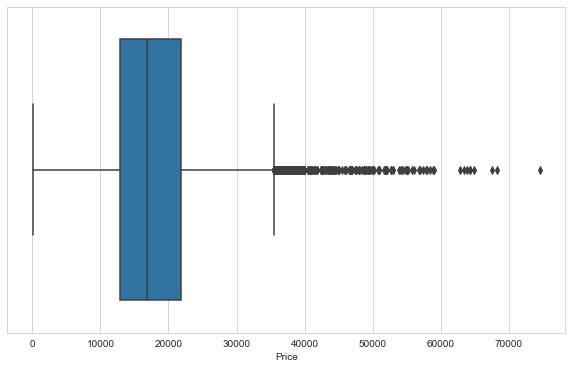

In [42]:
sns.boxplot(df.Price) # Are there any outlier price  in our prices? Just check it
plt.show()

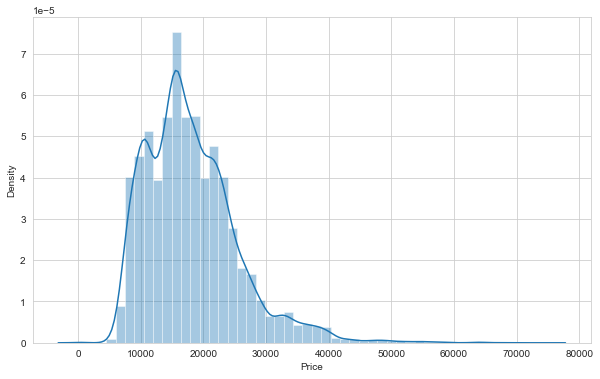

In [43]:
sns.distplot(df.Price);  # look at the distribution of prices.

In [44]:
df.Price.describe()  # mean is bigger than 50% (median).it is quite few right skew

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: Price, dtype: float64

## Vat

In [45]:
df.Vat.value_counts(dropna=True)

VAT deductible      10980
Price negotiable      426
Name: Vat, dtype: int64

## Km

In [46]:
df.Km.value_counts(dropna=False) 

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
11,034 km       1
97,211 km       1
57,193 km       1
21,628 km       1
19,503 km       1
Name: Km, Length: 6690, dtype: int64

In [47]:
df.Km.isnull().sum()

0

In [48]:
df.Km.str.replace(',','').str.extract('(\d+)') # we remowe comma.This is a Regex pattern \d+ for digits

0
0      56013
1      80000
2      83450
3      73000
4      16200
...      ...
15914    NaN
15915   9900
15916     15
15917     10
15918    NaN

[15919 rows x 1 columns]

In [49]:
df.Km= df.Km.str.replace(',','').str.extract('(\d+)').astype("float") # Convert type as float

In [50]:
df.Km.value_counts(dropna=False) # it's looking good shape.

10.000        1045
NaN           1024
1.000          367
5.000          170
50.000         148
              ... 
160542.000       1
20719.000        1
91910.000        1
39860.000        1
57889.000        1
Name: Km, Length: 6690, dtype: int64

## Registration & First Registration

In [51]:
df.Registration.value_counts(dropna =False) 

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
12/2019       1
11/2019       1
Name: Registration, dtype: int64

In [52]:
df["First Registration"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

<b>we can use "First Registration" column because we don't need month values<b>

In [53]:
df['First Registration'] = df['First Registration'].str[1].astype("float")

In [54]:
df["First Registration"].value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: First Registration, dtype: int64

- All the data obtained at 2019, so I need to think like I am at that year. So let's calculate the age of cars then drop them.

In [55]:
df['Age'] = 2019 - df['First Registration']

In [56]:
df.Age.value_counts(dropna=False)  # it's looking good

1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: Age, dtype: int64

In [57]:
df.drop(["Registration", "First Registration"], axis=1, inplace=True) # we can drop REgistration & First Registration column

## Prev_owner & Previous Owners

In [58]:
df.Prev_Owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: Prev_Owner, dtype: int64

In [59]:
df["Previous Owners"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                               8101
NaN                                 6640
\n2\n                                766
\n0\n                                163
\n3\n                                 17
                                    ... 
[\n1\n, \n137 g CO2/km (comb)\n]       1
[\n2\n, \n127 g CO2/km (comb)\n]       1
[\n1\n, \n159 g CO2/km (comb)\n]       1
[\n0\n, \n117 g CO2/km (comb)\n]       1
[\n1\n, \n102 g CO2/km (comb)\n]       1
Name: Previous Owners, Length: 103, dtype: int64

In [60]:
df["Previous_Owners"] = [x[0] if type(x) == list else x for x in df["Previous Owners"]]  # let's rename and appyl method
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [61]:
df["Previous_Owners"] = df["Previous_Owners"].str.strip("\n").astype('float') 

In [62]:
# Let's look at the new version of our columns
df.Previous_Owners.value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous_Owners, dtype: int64

In [63]:
df.drop(["Previous Owners","Prev_Owner"], axis=1, inplace=True ) # drop it old columns

## Hp

In [64]:
df.Hp.value_counts(dropna=True)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
1 kW        20
78 kW       20
146 kW      18
294 kW      18
141 kW      16
57 kW       10
120 kW       8
104 kW       8
112 kW       7
191 kW       7
117 kW       6
155 kW       6
184 kW       5
76 kW        4
65 kW        4
90 kW        4
80 kW        3
149 kW       3
93 kW        3
98 kW        3
168 kW       3
150 kW       2
63 kW        2
89 kW        2
270 kW       2
40 kW        2
228 kW       2
127 kW       2
140 kW       2
143 kW       2
86 kW        2
167 kW    

In [65]:
df["Hp"] = df.Hp.str.extract('(\d+)').astype('float')  # let's get the fields we will use in our column and rename column

In [66]:
df.Hp

0        66.000
1       141.000
2        85.000
3        66.000
4        66.000
          ...  
15914   147.000
15915   165.000
15916   146.000
15917   147.000
15918   165.000
Name: Hp, Length: 15919, dtype: float64

## Type

In [67]:
df.Type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, Pre-registered, , CNG]                                                                                                  1
[, Used, , Others (Particulate Filter)]                                                                                    1


In [68]:
df["Type"] = df.Type.str[1]  # I need second values

In [69]:
df['Type'].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection & Inspection new

In [70]:
df["Next Inspection"].value_counts(dropna=False)  

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n11/2020\n, \n137 g CO2/km (comb)\n]        1
[\n07/2021\n, \n113 g CO2/km (comb)\n]        1
[\n07/2019\n, \n119 g CO2/km (comb)\n]        1
[\n12/2019\n, \n112 g CO2/km (comb)\n]        1
[\n04/2019\n, \n96 g CO2/km (comb)\n]         1
Name: Next Inspection, Length: 1400, dtype: int64

In [71]:
df["Inspection New"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 4.4 l/100 km (comb), \n, 5.4 l/100 km (city), \n, 5 l/100 km (country), \n]          1
[\nYes\n, \n194 g CO2/km (comb)\n]                                                                 1
[\nYes\n, \n88 g CO2/km (comb)\n]                                                                  1
[\nYes\n, \n, 6 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]  

In [72]:
 # let's get the fields we will use in our columns
    
df["Inspection_New"] = [x[0] if type(x) == list else x for x in df["Inspection New"]]

In [73]:
df["Inspection_New"] = df["Inspection_New"].str.strip()

In [74]:
df["Inspection_New"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_New, dtype: int64

In [75]:
df.drop(["Next Inspection", "Inspection New"], axis=1, inplace=True)

## Warranty

In [76]:
df.Warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                  5420
[\n, \n, \nEuro 6\n]                                                                                 1868
\n12 months\n                                                                                        1177
\n                                                                                                    979
\n24 months\n                                                                                         566
                                                                                                     ... 
[\n23 months\n, \nEuro 6\n]                                                                             1
[\n24 months\n, \n95 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6.1 l/100 km (comb), \n, 7.7 l/100 km (city), \n, 5.2 l/100 km (country), \n]              1
[\n36 months\n, \n, 5.5 l/100 km (comb), \n, 6

In [77]:
 # let's get the fields we will use in our columns
df.Warranty = [x[0] if type(x) == list else x for x in df.Warranty]

In [78]:
df["Warranty"] = df.Warranty.str.strip().str.extract('(\d+)').astype("float") 
df.Warranty

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
15914   24.000
15915      NaN
15916      NaN
15917      NaN
15918      NaN
Name: Warranty, Length: 15919, dtype: float64

In [79]:
df.Warranty.value_counts(dropna=False)

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
19.000        3
1.000         3
4.000         3
13.000        3
34.000        3
45.000        2
14.000        2
17.000        2
11.000        2
46.000        2
28.000        2
21.000        2
22.000        2
9.000         2
30.000        1
33.000        1
56.000        1
40.000        1
7.000         1
15.000        1
8.000         1
10.000        1
49.000        1
47.000        1
65.000        1
Name: Warranty, dtype: int64

## Full Service

In [80]:
df["Full Service"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7 l/100 km (city), \n, 4.5 l/100 km (country), \n]         1
[\n, \n, \n, 4.7 l/100 km (comb), \n, 5.4 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \n164 g CO2/km (comb)\n]                                                                1
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \

In [81]:
# Lets drop I we dont need this column 

df.drop("Full Service", axis = 1, inplace=True)

## Non-smoking Vehicle

In [82]:
df['Non-Smoking Vehicle'].value_counts(dropna=False)  # again, another unnecessary column

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [83]:
# Lets drop  we dont need this column 

df.drop(["Non-Smoking Vehicle"], axis = 1, inplace=True)

## Offer Number

In [84]:
df['Offer Number'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                3175
[\nXT61649\n]        27
[\nHM53619\n]        27
[\nTP62881\n]        27
[\nJV03654\n]        27
                   ... 
[\n9277941\n]         1
[\n19155-1\n]         1
[\n3124254\n]         1
[\nJ1109546\n]        1
[\n040394-MO\n]       1
Name: Offer Number, Length: 11441, dtype: int64

In [85]:
# lets drop this column we dont need it

df.drop("Offer Number", axis = 1, inplace=True)

## Body Color

In [86]:
df["Body Color"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [87]:
df["Body_Color"]=df["Body Color"].str[1]  # just slicing and renaming column

In [88]:
df.Body_Color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

In [89]:
df.drop("Body Color", axis=1, inplace=True)

## Body Color Orginal

In [90]:
df['Body Color Original'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                     3759
[\nOnyx Schwarz\n]                       338
[\nBianco\n]                             282
[\nMythosschwarz Metallic\n]             238
[\nBrillantschwarz\n]                    216
                                        ... 
[\nBlu cosmo metallizzato\n]               1
[\nBlac Ivoire D16\n]                      1
[\nkarbonschwarz met\n]                    1
[\nBelugabraun Metallic (bruin me\n]       1
[\nSATIN STEEL\n]                          1
Name: Body Color Original, Length: 1928, dtype: int64

In [91]:
df.drop("Body Color Original", axis=1, inplace=True)  # This is german. drop it

## Paint Type

In [92]:
df["Paint Type"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [93]:
df["Paint_Type"]=df["Paint Type"].str[0].str.strip()

In [94]:
df["Paint_Type"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [95]:
df.drop("Paint Type", axis=1, inplace=True)

## Upholstery

In [96]:
df['Upholstery'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nFull leather, Beige\n]      36
[\nVelour, Black\n]            36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nCloth, Whit

In [97]:
upholstery_type = ['Cloth', 'Part leather', 'Full leather', 'alcantara', 'Velour', 'Other']
upholstery_color = ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White', 'Red', 'Yellow', 'Orange', 'Other']

def uphols_type(x):
    
    if type(x) == list:
        if x[0].strip().split(', ')[0] in upholstery_type: return x[0].strip().split(', ')[0]
        else: return None
    else:
        return None
    
    
def uphols_color(x):

    if type(x) == list:
        if x[0].strip().split(', ')[-1] in upholstery_color: return x[0].strip().split(', ')[-1]
        else: return None
    else:
        return None   

df['Upholstery_Type'] = df['Upholstery'].apply(uphols_type)
df['Upholstery_Color'] = df['Upholstery'].apply(uphols_color)    

In [98]:
df['Upholstery_Type'].value_counts(dropna=False)

Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: Upholstery_Type, dtype: int64

In [99]:
df['Upholstery_Color'].value_counts(dropna =False)

Black     8201
NaN       5022
Grey      1376
Other     1016
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_Color, dtype: int64

In [100]:
df.drop("Upholstery", axis=1, inplace=True) # just drop it we not use

## Nr. of Doors

In [101]:
df["Nr. Of Doors"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. Of Doors, dtype: int64

In [102]:
 # let's get the fields we will use in our columns
df["Nr_Of_Doors"] = df["Nr. Of Doors"].str[0].str.strip().astype("float")

In [103]:
df.Nr_Of_Doors.value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
7.000        1
1.000        1
Name: Nr_Of_Doors, dtype: int64

In [104]:
df.drop("Nr. Of Doors", axis=1, inplace=True)

## Nr. of Seats

In [105]:
df["Nr. Of Seats"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. Of Seats, dtype: int64

In [106]:
# let's get the fields we will use in our columns
df["Nr_Of_Seats"] = df["Nr. Of Seats"].str[0].str.strip().astype("float")

In [107]:
df["Nr_Of_Seats"].value_counts(dropna=False)

5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr_Of_Seats, dtype: int64

In [108]:
df.drop("Nr. Of Seats", axis=1, inplace=True)

## Model Code

In [109]:
df['Model Code'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/BHX\n]        1
[\n0588/AVR\n]        1
[\n0035/ASN\n]        1
[\n1844/AEG\n]        1
[\n3333/BBL\n]        1
Name: Model Code, Length: 233, dtype: int64

In [110]:
df.drop("Model Code", axis=1, inplace=True) # not necessary

## Gearing Type

In [111]:
df["Gearing Type"].value_counts(dropna=False) 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [112]:
df["Gear_Type"] = df["Gearing Type"].str[1]  # I will only extract the first index

In [113]:
df.Gear_Type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gear_Type, dtype: int64

In [114]:
df.drop("Gearing Type", axis=1, inplace=True)

## Displacement

In [115]:
df.Displacement.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
NaN                 496
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,984 cc\n]       18
[\n1,200 cc\n]       18
[\n1,397 cc\n]       11
[\n899 cc\n]         11
[\n160 cc\n]          6
[\n929 cc\n]          5
[\n1,499 cc\n]        5
[\n139 cc\n]          4
[\n900 cc\n]          4
[\n1,596 cc\n]        4
[\n997 cc\n]          4
[\n1,396 cc\n]  

In [116]:
df["Displacement"] = df.Displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d+)')[0].astype("float") 

In [117]:
df["Displacement_cc"] = df["Displacement"]  # column name with cc

In [118]:
df.Displacement_cc.value_counts(dropna=False)

1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
NaN           496
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1984.000       18
1200.000       18
899.000        11
1397.000       11
160.000         6
1499.000        5
929.000         5
139.000         4
900.000         4
1596.000        4
997.000         4
1199.000        3
1599.000        3
1396.000        3
1495.000        2
1300.000        2
1589.000        2
2.000           2
995.000         2
1568.000        1
1584.000        1
16000.000       1
1369.000        1
996.000         1
1686.000        1
1100.000  

In [119]:
df.drop("Displacement", axis=1, inplace=True)

## Cylinders

In [120]:
df["Cylinders"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [121]:
df["Cylinders"]=df["Cylinders"].str[0].str.strip('\n').astype("float")

In [122]:
df.Cylinders.value_counts(dropna=False)

4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64

## Weight

In [123]:
df.Weight.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,761 kg\n]       1
[\n1,331 kg\n]       1
[\n1,974 kg\n]       1
[\n1,711 kg\n]       1
[\n1,686 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [124]:
df["Weight_kg"] = df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d+)')[0].astype('float')

In [125]:
df.Weight_kg.value_counts(dropna=False)

NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1161.000       1
1254.000       1
1379.000       1
1575.000       1
1159.000       1
Name: Weight_kg, Length: 435, dtype: int64

In [126]:
df.drop("Weight", axis=1, inplace=True)

## Drive chain

In [127]:
df["Drive Chain"].value_counts(dropna=False)  

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive Chain, dtype: int64

In [128]:
df['Drive_Chain'] = df['Drive Chain'].str[0].str.strip('\n')

In [129]:
df.Drive_Chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_Chain, dtype: int64

In [130]:
df.drop("Drive Chain", axis=1, inplace=True)

## Fuel

In [131]:
df.Fuel.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [132]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [133]:
df["Fuel"].value_counts()

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Others                                  5
Electric                                5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [134]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [135]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Domestic gas H             1
Biogas                     1
Name: Fuel, dtype: int64

In [136]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["Fuel"] = df.Fuel.apply(fueltype)

In [137]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

## Consumption

In [138]:
df["Consumption"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.1 l/100 km (comb)], [], [3.5 l/100 km (country)]]                                    1
[[5.2 l/100 km (comb)], [6 l/100 km (city)], [4.8 l/100 km (country)]]                   1
[[5.3 l/100 km (comb)], [6 l/100 km (city)], [5 l/100 km (country)]]                     1
[\n, 6.5 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.5 l/100 km (country), \n]       1
[[50 l/100 km (comb)], [64 l/100 km (city)], [42 l/100 km (country)]]                    1

In [139]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [140]:
df['Cons_Comb'] = df.Consumption.apply(parser1).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Cons_City'] = df.Consumption.apply(parser2).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Cons_Country'] = df.Consumption.apply(parser3).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [141]:
df["Cons_Comb"].value_counts(dropna=False).head()

NaN      2033
5.400     770
3.900     733
4.000     713
5.100     657
Name: Cons_Comb, dtype: int64

In [142]:
df["Cons_City"].value_counts(dropna=False).head()

NaN      2436
5.000     669
5.800     633
4.500     580
4.300     533
Name: Cons_City, dtype: int64

In [143]:
df["Cons_Country"].value_counts(dropna=False).head()

NaN      2376
4.200    1178
3.700    1089
4.400     898
4.500     848
Name: Cons_Country, dtype: int64

In [144]:
df.drop("Consumption", axis = 1, inplace=True)

## CO2 Emission

In [145]:
df["Co2 Emission"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                             1808
[\n120 g CO2/km (comb)\n]        740
[[], [], []]                     628
[\n99 g CO2/km (comb)\n]         545
[\n97 g CO2/km (comb)\n]         537
                                ... 
[\n990 g CO2/km (comb)\n]          1
[\n51 g CO2/km (comb)\n]           1
[\n14,457 g CO2/km (comb)\n]       1
[\n193 g CO2/km (comb)\n]          1
[\n253 g CO2/km (comb)\n]          1
Name: Co2 Emission, Length: 124, dtype: int64

In [146]:
df["Co2_Emission"] = df["Co2 Emission"].str[0].str.strip().str.strip(" g CO2/km (comb)").str.replace(",", ".").astype("float") 

In [147]:
df.Co2_Emission.value_counts(dropna=False)

NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
165.000       1
45.000        1
53.000        1
160.000       1
171.000       1
Name: Co2_Emission, Length: 121, dtype: int64

In [148]:
df.drop("Co2 Emission", axis=1, inplace=True)  # drop old column

## Emission Class

In [149]:
df["Emission Class"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [150]:
df["Emission_Class"] = df["Emission Class"].str[0].str.strip()

In [151]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [152]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [153]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [154]:
df.drop("Emission Class", axis=1, inplace=True) # drop old column

## Emission Label

In [155]:
df["Emission Label"].value_counts(dropna=False) 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [156]:
df.drop("Emission Label", axis=1, inplace=True)  # not necessary

## Comfort Convenience

In [157]:
df["Comfort_Convenience"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                      

In [158]:
df["Comfort_Convenience"] = [",".join(item) if type(item) == list else item for item in df["Comfort_Convenience"]]  # join together 

In [159]:
df["Comfort_Convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

## Entertainment_Media

In [160]:
df["Entertainment_Media"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                          1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                             1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                         982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                              783
[On-board computer, Radio]                                                                                    487
                                                                                                             ... 
[CD player, Hands-free equipment, On-board computer, Radio, Sound system, Television]                           1
[Bluetooth, CD player, Digital radio, MP3, Radio, Sound system, USB]                                            1
[CD player, Hands-free equipment, MP3, Radio, USB]                                      

In [161]:
df["Entertainment_Media"] = [",".join(item) if type(item) == list else item for item in df["Entertainment_Media"]]

In [162]:
df["Entertainment_Media"].value_counts(dropna=False)

NaN                                                                                1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                         1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                      982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB            783
On-board computer,Radio                                                             487
                                                                                   ... 
Bluetooth,Digital radio,Hands-free equipment,MP3,Sound system,USB                     1
Bluetooth,CD player,Digital radio,On-board computer,Radio,Sound system,USB            1
CD player,Hands-free equipment,MP3,Radio                                              1
Bluetooth,CD player,Digital radio,Radio                                               1
Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,Television,USB       1
Name: Entertainment_Media, Lengt

## Extras

In [163]:
df["Extras"].value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                 3245
NaN                                            2962
[Alloy wheels, Touch screen]                    697
[Alloy wheels, Voice Control]                   577
[Alloy wheels, Touch screen, Voice Control]     541
Name: Extras, dtype: int64

In [164]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [165]:
df["Extras"].value_counts(dropna=False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: Extras, dtype: int64

## Safety_Security

In [166]:
df["Safety_Security"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [167]:
df["Safety_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_Security"]]

In [168]:
df["Safety_Security"].value_counts(dropna=False).head(5)

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

## Gears

In [169]:
df["Gears"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [170]:
df["Gears"]=df["Gears"].str[0].str.strip()

In [171]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
4         2
3         2
50        1
2         1
Name: Gears, dtype: int64

## Country Version

In [172]:
df["Country Version"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nBulgaria\n]             2
[\nRomania\n]              2
[\nEgypt\n]                1
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
Name: Country Version, dtype: int64

In [173]:
df.drop("Country Version", axis=1, inplace=True) # origin country not need drop it

# The End of Part-1

I have finished our first part, namely our data cleaning section.

"***Our goal here is to put the data into the Machine Learn algorithm in the future:***"

- Standardize
- Remove unwanted strings
- Converting numeric columns to float data type (important for float ML models)
- Setting data types
- To make the data ready for the next stages (handling missing valu and outliers).

In [174]:
df.shape

(15919, 33)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make_Model           15919 non-null  object 
 1   Body_Type            15859 non-null  object 
 2   Price                15919 non-null  int64  
 3   Vat                  11406 non-null  object 
 4   Km                   14895 non-null  float64
 5   Hp                   15831 non-null  float64
 6   Type                 15917 non-null  object 
 7   Warranty             4853 non-null   float64
 8   Cylinders            10239 non-null  float64
 9   Fuel                 15919 non-null  object 
 10  Comfort_Convenience  14999 non-null  object 
 11  Entertainment_Media  14545 non-null  object 
 12  Extras               12957 non-null  object 
 13  Safety_Security      14937 non-null  object 
 14  Gears                11207 non-null  object 
 15  Age                  14322 non-null 

In [177]:
df.to_csv("clean_scout.csv", index=False)